## Global Superstore SQL Project

Analyzing customer orders, sales, & profitability from the Global Superstore dataset using SQL and Python. We'll gather KPI's, insights, and vizualize buisness performance trends. 

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/mymac/Documents/DataProjects/GssProject/Global_Superstore2.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## Cleaning Column Names

In [2]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

## Exporting to SQLite

In [3]:
conn = sqlite3.connect('global_superstore.db')

df.to_sql('superstore_sales', conn, if_exists='replace', index=False)

pd.read_sql("SELECT * FROM superstore_sales LIMIT 5;", conn)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


## KPI 1: Total Revenue

Calculating total revenue generated across all orders.

In [4]:
query = "SELECT ROUND(SUM(sales), 2) AS total_revenue FROM superstore_sales;"
pd.read_sql(query, conn)

,total_revenue
0,12642501.91


## Visual: Total Revenue 

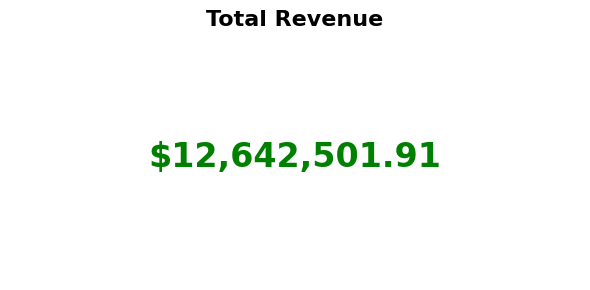

In [5]:
revenue = pd.read_sql(query, conn)['total_revenue'][0]

fig, ax = plt.subplots(figsize=(6, 3))
ax.text(0.5, 0.5, f"${revenue:,.2f}", fontsize=24, ha='center', va='center', weight='bold', color='green')
ax.set_title("Total Revenue", fontsize=16, weight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()

## KPI 2: Monthly Revenue Trend

In [11]:
query = '''

SELECT
    strftime('%Y-%m', order_date) AS order_month,
    ROUND(SUM(sales), 2) AS monthly_revenue
FROM superstore_sales
WHERE order_date IS NOT NULL
GROUP BY order_month
ORDER BY order_month;
'''

monthly_revenue = pd.read_sql(query, conn)
monthly_revenue = monthly_revenue.dropna()
monthly_revenue.head()

,order_month,monthly_revenue
1,2011-01,82168.03
2,2011-02,79570.07
3,2011-03,80270.38
4,2011-04,64133.17
5,2011-05,56077.69


## Visual: Monthly Revenue Trend

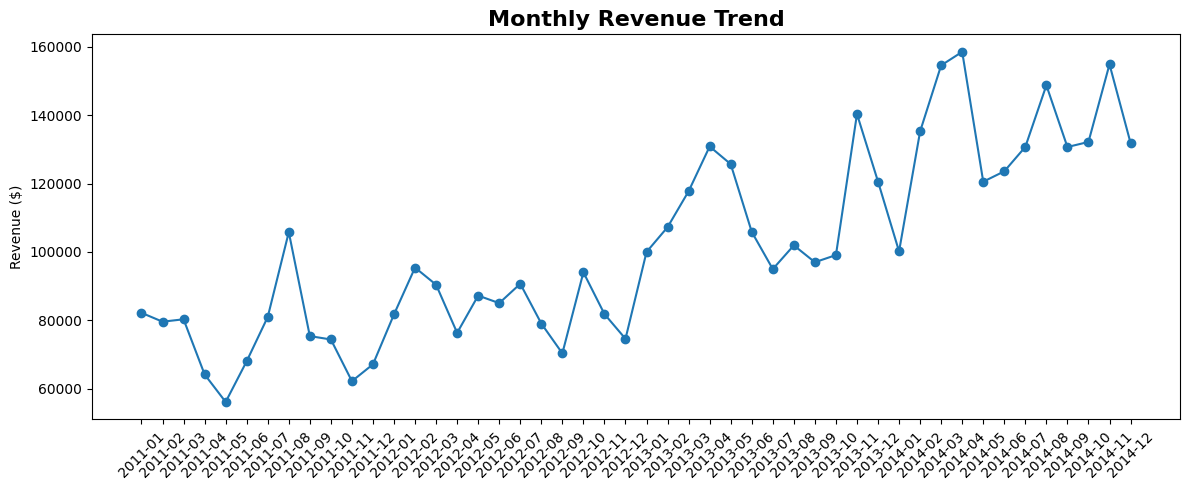

In [12]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(monthly_revenue['order_month'], monthly_revenue['monthly_revenue'], marker='o')

ax.set_title('Monthly Revenue Trend', fontsize=16, weight='bold', )
ax.set_label('Order Month')
ax.set_ylabel('Revenue ($)')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## KPI 3: Segment Revenue 

In [13]:
query = '''

SELECT
    segment,
    ROUND(SUM(sales), 2) AS segment_revenue
FROM superstore_sales
GROUP BY segment
ORDER BY segment_revenue DESC;
'''

segment_revenue = pd.read_sql(query, conn)
segment_revenue.head()

,segment,segment_revenue
0,Consumer,6507949.42
1,Corporate,3824697.52
2,Home Office,2309854.97


## Visual: Revenue by Segment 

In [20]:
import matplotlib.ticker as ticker

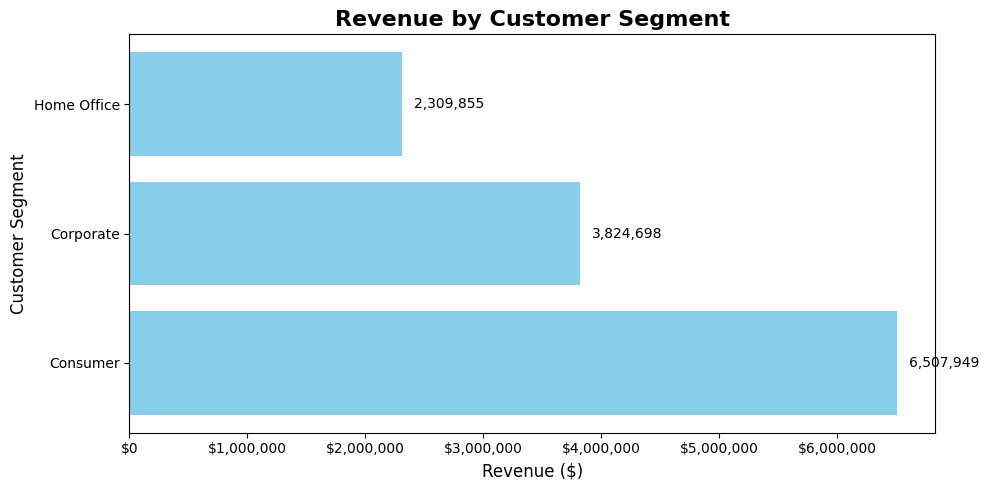

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(segment_revenue['segment'], segment_revenue['segment_revenue'], color='skyblue')

for i, value in enumerate(segment_revenue['segment_revenue']):
    ax.text(value + 100000, i, f"{value:,.0f}", va='center', fontsize=10)

ax.set_title('Revenue by Customer Segment', fontsize=16, weight='bold',)
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.set_ylabel('Customer Segment', fontsize=12)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Query - Regional Revenue

In [23]:
query = '''

SELECT 
    region, 
    ROUND(SUM(sales), 2) AS region_revenue
FROM superstore_sales
GROUP BY region
ORDER BY region_revenue DESC;
'''

region_revenue = pd.read_sql(query, conn)
region_revenue.head()

,region,region_revenue
0,Central,2822302.52
1,South,1600907.04
2,North,1248165.60
3,Oceania,1100184.61
4,Southeast Asia,884423.17


## Regional Revenue Visual 

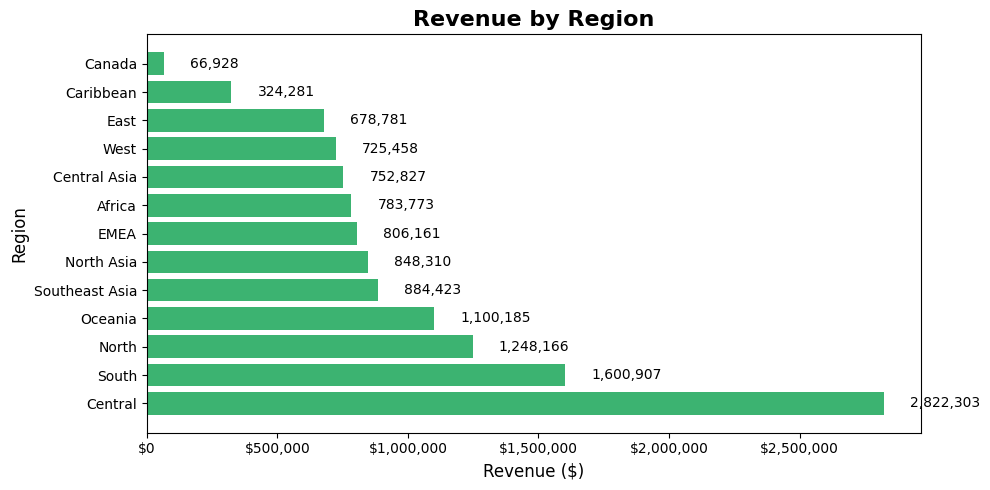

In [29]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(region_revenue['region'], region_revenue['region_revenue'], color='mediumseagreen')

for i, value in enumerate(region_revenue['region_revenue']):
    ax.text(value + 100000, i, f"{value:,.0f}", va='center', fontsize=10)

ax.set_title('Revenue by Region', fontsize=16, weight='bold')
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.set_ylabel('Region', fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Query - Revenue by Category 

In [32]:
query = '''

SELECT
    category,
    ROUND(SUM(sales), 2) AS category_revenue
FROM superstore_sales
GROUP BY category
ORDER BY category_revenue DESC;
'''

category_revenue = pd.read_sql(query, conn)
category_revenue.head()

,category,category_revenue
0,Technology,4744557.50
1,Furniture,4110874.19
2,Office Supplies,3787070.23


##  Revenue by Category Visual 

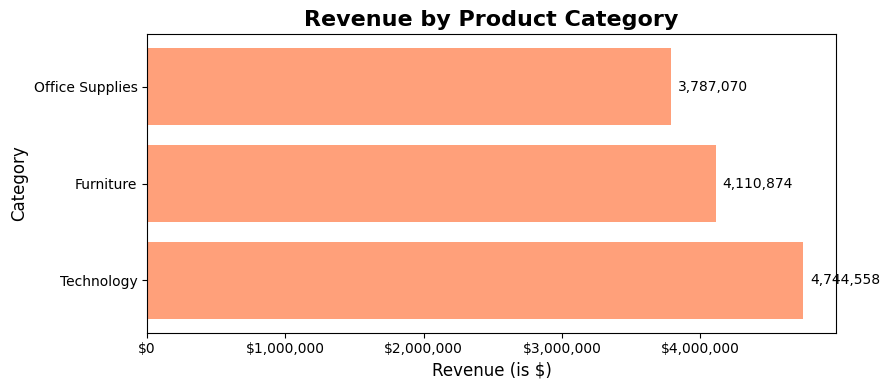

In [33]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.barh(category_revenue['category'], category_revenue['category_revenue'], color='lightsalmon')

for i, value in enumerate(category_revenue['category_revenue']):
    ax.text(value +50000, i, f"{value:,.0f}", va='center', fontsize=10)

ax.set_title('Revenue by Product Category', fontsize=16, weight='bold')
ax.set_xlabel('Revenue (is $)', fontsize=12)
ax.set_ylabel('Category', fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Query - Profit by Category

In [34]:
query = '''

SELECT
    category,
    ROUND(SUM(profit), 2) AS category_profit
FROM superstore_sales
GROUP BY category
ORDER BY category_profit DESC;
'''

category_profit = pd.read_sql(query, conn)
category_profit.head()

,category,category_profit
0,Technology,663778.73
1,Office Supplies,518473.83
2,Furniture,285204.72


## Profit by Category Visual 

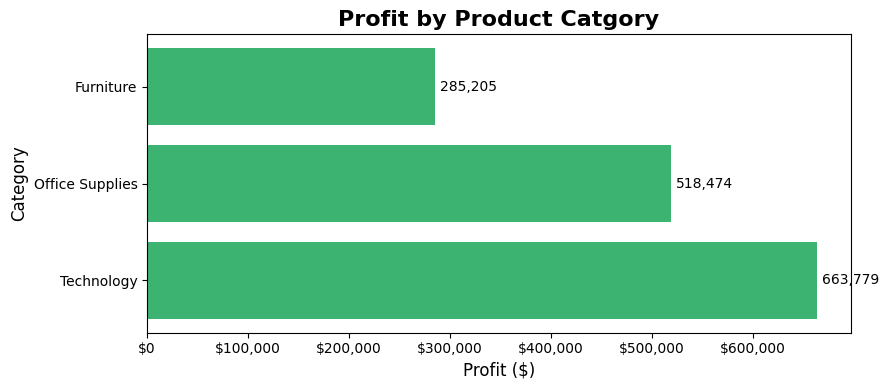

In [35]:
fig, ax = plt.subplots(figsize=(9, 4))

ax.barh(category_profit['category'], category_profit['category_profit'], color='mediumseagreen')

for i, value in enumerate(category_profit['category_profit']):
    ax.text(value + 5000, i, f"{value:,.0f}", va='center', fontsize=10)

ax.set_title('Profit by Product Catgory', fontsize=16, weight='bold')
ax.set_xlabel('Profit ($)', fontsize=12)
ax.set_ylabel('Category', fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

## Top 10 Sub-Categories by Revenue

In [36]:
query = '''

SELECT
    sub_category,
    ROUND(SUM(sales), 2) AS subcat_revenue
FROM superstore_sales
GROUP BY sub_category
ORDER BY subcat_revenue DESC
LIMIT 10
'''

top_subcats = pd.read_sql(query, conn)
top_subcats.head()

,sub_category,subcat_revenue
0,Phones,1706824.14
1,Copiers,1509436.27
2,Chairs,1501681.76
3,Bookcases,1466572.24
4,Storage,1127085.86


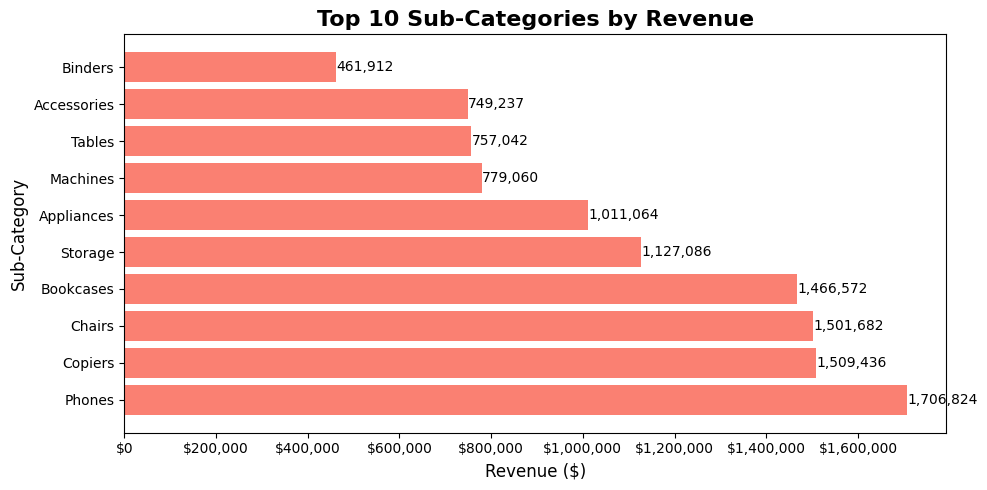

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.barh(top_subcats['sub_category'], top_subcats['subcat_revenue'], color='salmon')

for i, value in enumerate(top_subcats['subcat_revenue']):
    ax.text(value + 1000, i, f"{value:,.0f}", va='center', fontsize=10)

ax.set_title('Top 10 Sub-Categories by Revenue', fontsize=16, weight='bold')
ax.set_xlabel('Revenue ($)', fontsize=12)
ax.set_ylabel('Sub-Category', fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

plt.tight_layout()
plt.show()